In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("houseprice.csv")
data

,Id,HouseType,Alley,PlotArea,Street,PlotConfig,LandSlope,Neighborhood,OverallQual,OverallCond,...,2ndFlrSF,GrLivArea,Bathrooms,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,PoolArea,YrSold,HousePrice
0,1,60,NaN,8450,Paved,Inside,Gentle,CollgCr,7,5,...,854,1710,2.0,Good,0,548,0,0.0,2008,208500.0
1,2,20,NaN,9600,Paved,FR2,Gentle,Veenker,6,8,...,0,1262,2.0,Average,1,460,298,0.0,2007,181500.0
2,3,60,NaN,11250,Paved,Inside,Gentle,CollgCr,7,5,...,866,1786,2.0,Good,1,608,0,0.0,2008,223500.0
3,4,70,NaN,9550,Paved,Corner,Gentle,Crawfor,7,5,...,756,1717,1.0,Good,1,642,0,0.0,2006,140000.0
4,5,60,NaN,14260,Paved,FR2,Gentle,NoRidge,8,5,...,1053,2198,2.0,Good,1,836,192,0.0,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,NaN,7917,Paved,Inside,Gentle,Gilbert,6,5,...,694,1647,NaN,Average,1,460,0,NaN,2007,175000.0
1456,1457,20,NaN,13175,Paved,Inside,Gentle,NWAmes,6,6,...,0,2073,NaN,Average,2,500,349,NaN,2010,210000.0
1457,1458,70,NaN,9042,Paved,Inside,Gentle,Crawfor,7,9,...,1152,2340,NaN,Good,2,252,0,NaN,2010,NaN
1458,1459,20,NaN,9717,Paved,Inside,Gentle,NAmes,5,6,...,0,1078,NaN,Good,0,240,366,NaN,2010,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   HouseType     1460 non-null   int64  
 2   Alley         91 non-null     object 
 3   PlotArea      1460 non-null   int64  
 4   Street        1460 non-null   object 
 5   PlotConfig    1460 non-null   object 
 6   LandSlope     1460 non-null   object 
 7   Neighborhood  1460 non-null   object 
 8   OverallQual   1460 non-null   int64  
 9   OverallCond   1460 non-null   int64  
 10  YearBuilt     1460 non-null   int64  
 11  ExterQual     1460 non-null   object 
 12  1stFlrSF      1454 non-null   float64
 13  2ndFlrSF      1460 non-null   int64  
 14  GrLivArea     1460 non-null   int64  
 15  Bathrooms     1450 non-null   float64
 16  KitchenQual   1460 non-null   object 
 17  Fireplaces    1460 non-null   int64  
 18  GarageArea    1460 non-null 

In [4]:
data.isnull().sum()

Id                 0
HouseType          0
Alley           1369
PlotArea           0
Street             0
PlotConfig         0
LandSlope          0
Neighborhood       0
OverallQual        0
OverallCond        0
YearBuilt          0
ExterQual          0
1stFlrSF           6
2ndFlrSF           0
GrLivArea          0
Bathrooms         10
KitchenQual        0
Fireplaces         0
GarageArea         0
WoodDeckSF         0
PoolArea         677
YrSold             0
HousePrice         3
dtype: int64

In [5]:
data.drop(["Alley","PoolArea","Id"], inplace = True, axis = 1)

In [6]:
data.dropna(axis = 0, inplace = True)

In [7]:
data.describe()

,HouseType,PlotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,Bathrooms,Fireplaces,GarageArea,WoodDeckSF,YrSold,HousePrice
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,56.931034,10522.846207,6.100690,5.574483,1971.186897,1162.055172,347.494483,1515.434483,1.564828,0.613103,473.833103,93.846897,2007.811724,180942.228276
std,42.245814,10011.453578,1.384948,1.112218,30.227095,386.899148,436.522522,526.129994,0.551306,0.643463,213.357481,124.106496,1.325963,79565.722833
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,20.000000,7544.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,1128.500000,1.000000,0.000000,336.000000,0.000000,2007.000000,129900.000000
50%,50.000000,9485.000000,6.000000,5.000000,1972.000000,1086.000000,0.000000,1464.000000,2.000000,1.000000,480.000000,0.000000,2008.000000,163000.000000
75%,70.000000,11604.500000,7.000000,6.000000,2000.000000,1391.750000,728.000000,1776.000000,2.000000,1.000000,576.000000,168.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,1418.000000,857.000000,2010.000000,755000.000000


In [8]:
data

,HouseType,PlotArea,Street,PlotConfig,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,ExterQual,1stFlrSF,2ndFlrSF,GrLivArea,Bathrooms,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,YrSold,HousePrice
0,60,8450,Paved,Inside,Gentle,CollgCr,7,5,2003,Gd,856.0,854,1710,2.0,Good,0,548,0,2008,208500.0
1,20,9600,Paved,FR2,Gentle,Veenker,6,8,1976,TA,1262.0,0,1262,2.0,Average,1,460,298,2007,181500.0
2,60,11250,Paved,Inside,Gentle,CollgCr,7,5,2001,Gd,920.0,866,1786,2.0,Good,1,608,0,2008,223500.0
3,70,9550,Paved,Corner,Gentle,Crawfor,7,5,1915,TA,961.0,756,1717,1.0,Good,1,642,0,2006,140000.0
4,60,14260,Paved,FR2,Gentle,NoRidge,8,5,2000,Gd,1145.0,1053,2198,2.0,Good,1,836,192,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,85,8400,Paved,Inside,Gentle,Sawyer,6,5,1966,TA,913.0,0,913,1.0,Average,0,240,0,2007,129000.0
1446,20,26142,Paved,CulDSac,Gentle,Mitchel,5,7,1962,TA,1188.0,0,1188,1.0,Average,0,312,261,2010,157900.0
1447,60,10000,Paved,Inside,Gentle,CollgCr,8,5,1995,Gd,1220.0,870,2090,2.0,Good,1,556,0,2007,240000.0
1448,50,11767,Paved,Inside,Gentle,Edwards,4,7,1910,TA,796.0,550,1346,1.0,Average,0,384,168,2007,112000.0


In [9]:
data.select_dtypes(include=["int","float"]).columns

Index(['HouseType', 'PlotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'Bathrooms', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'YrSold', 'HousePrice'],
      dtype='object')

In [10]:
num_data = data[['HouseType', 'PlotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'Bathrooms', 'Fireplaces',
       'GarageArea', 'WoodDeckSF', 'YrSold']]
cat_data = data.select_dtypes(include=["object"])

In [11]:
num_data

,HouseType,PlotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,Bathrooms,Fireplaces,GarageArea,WoodDeckSF,YrSold
0,60,8450,7,5,2003,856.0,854,1710,2.0,0,548,0,2008
1,20,9600,6,8,1976,1262.0,0,1262,2.0,1,460,298,2007
2,60,11250,7,5,2001,920.0,866,1786,2.0,1,608,0,2008
3,70,9550,7,5,1915,961.0,756,1717,1.0,1,642,0,2006
4,60,14260,8,5,2000,1145.0,1053,2198,2.0,1,836,192,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,85,8400,6,5,1966,913.0,0,913,1.0,0,240,0,2007
1446,20,26142,5,7,1962,1188.0,0,1188,1.0,0,312,261,2010
1447,60,10000,8,5,1995,1220.0,870,2090,2.0,1,556,0,2007
1448,50,11767,4,7,1910,796.0,550,1346,1.0,0,384,168,2007


In [12]:
cat_data

,Street,PlotConfig,LandSlope,Neighborhood,ExterQual,KitchenQual
0,Paved,Inside,Gentle,CollgCr,Gd,Good
1,Paved,FR2,Gentle,Veenker,TA,Average
2,Paved,Inside,Gentle,CollgCr,Gd,Good
3,Paved,Corner,Gentle,Crawfor,TA,Good
4,Paved,FR2,Gentle,NoRidge,Gd,Good
...,...,...,...,...,...,...
1445,Paved,Inside,Gentle,Sawyer,TA,Average
1446,Paved,CulDSac,Gentle,Mitchel,TA,Average
1447,Paved,Inside,Gentle,CollgCr,Gd,Good
1448,Paved,Inside,Gentle,Edwards,TA,Average


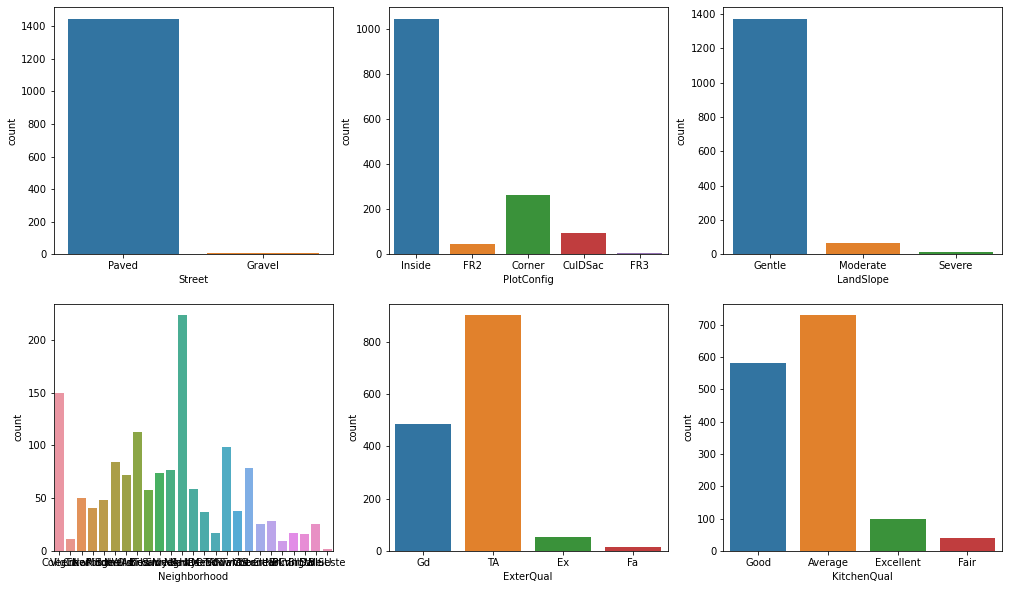

In [13]:
plt.figure(figsize=(17,10))
for i,j in enumerate(cat_data.columns):
    plt.subplot(2,3,i+1)
    sns.countplot(cat_data[j]);

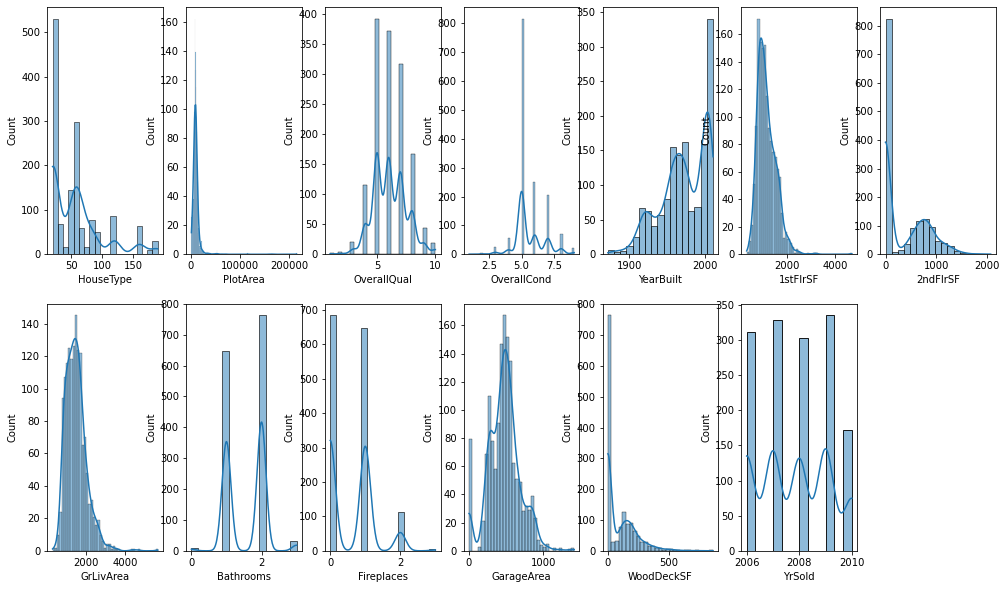

In [14]:
plt.figure(figsize=(17,10))
for i,j in enumerate(num_data.columns):
    plt.subplot(2,7,i+1)
    sns.histplot(num_data[j], kde = True);

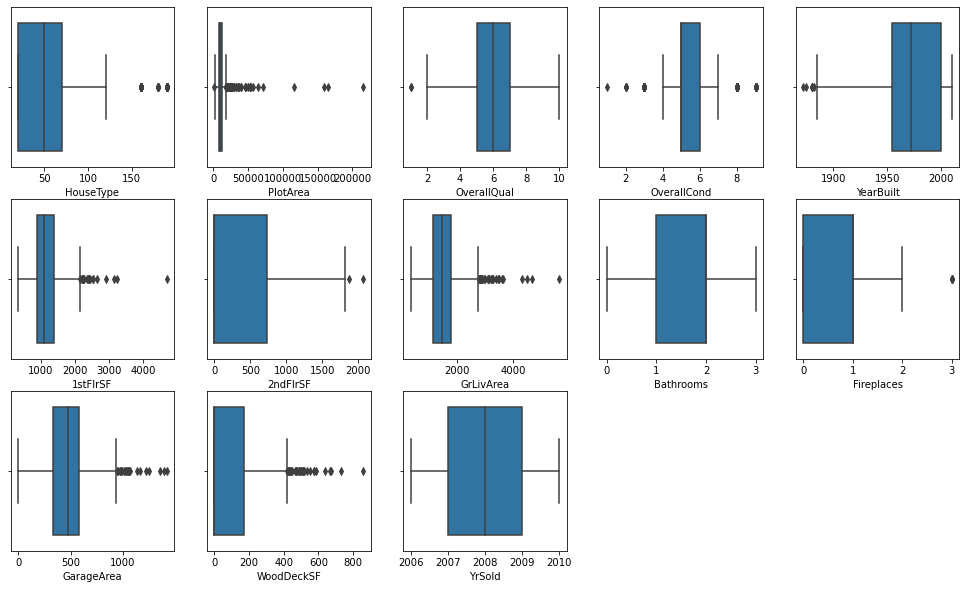

In [15]:
plt.figure(figsize=(17,10))
for i,j in enumerate(num_data.columns):
    plt.subplot(3,5,i+1)
    sns.boxplot( num_data[j]);

In [16]:
num_data.describe()

,HouseType,PlotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,Bathrooms,Fireplaces,GarageArea,WoodDeckSF,YrSold
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,56.931034,10522.846207,6.100690,5.574483,1971.186897,1162.055172,347.494483,1515.434483,1.564828,0.613103,473.833103,93.846897,2007.811724
std,42.245814,10011.453578,1.384948,1.112218,30.227095,386.899148,436.522522,526.129994,0.551306,0.643463,213.357481,124.106496,1.325963
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2006.000000
25%,20.000000,7544.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,1128.500000,1.000000,0.000000,336.000000,0.000000,2007.000000
50%,50.000000,9485.000000,6.000000,5.000000,1972.000000,1086.000000,0.000000,1464.000000,2.000000,1.000000,480.000000,0.000000,2008.000000
75%,70.000000,11604.500000,7.000000,6.000000,2000.000000,1391.750000,728.000000,1776.000000,2.000000,1.000000,576.000000,168.000000,2009.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,1418.000000,857.000000,2010.000000


In [17]:

for i in num_data:    
    Q1,Q3 = np.percentile(data[i] , [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    num_data[i] = [x if x<= ll or x <= ul else int(data[i].median()) for x in data[i]]
    print(i,": ", ll,"-", ul)

HouseType :  -55.0 - 145.0
PlotArea :  1454.5 - 17694.5
OverallQual :  2.0 - 10.0
OverallCond :  3.5 - 7.5
YearBuilt :  1885.0 - 2069.0
1stFlrSF :  117.375 - 2156.375
2ndFlrSF :  -1092.0 - 1820.0
GrLivArea :  157.25 - 2747.25
Bathrooms :  -0.5 - 3.5
Fireplaces :  -1.5 - 2.5
GarageArea :  -24.0 - 936.0
WoodDeckSF :  -252.0 - 420.0
YrSold :  2004.0 - 2012.0


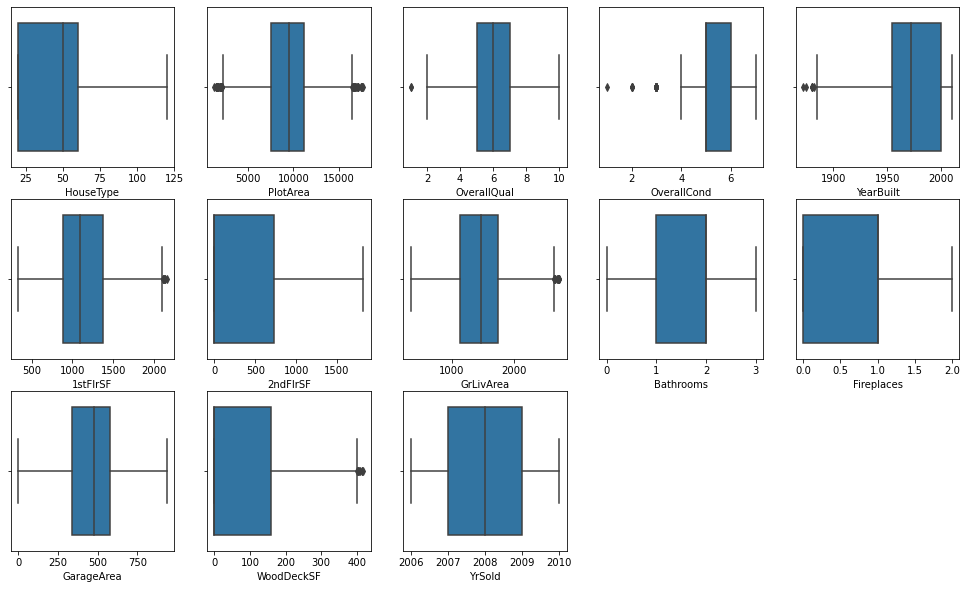

In [18]:
plt.figure(figsize=(17,10))
for i,j in enumerate(num_data.columns):
    plt.subplot(3,5,i+1)
    sns.boxplot( num_data[j]);

## Splitting the X and Y features

In [19]:
X = pd.concat([cat_data,num_data], axis = 1)
y = data["HousePrice"]

In [20]:
X.head()

,Street,PlotConfig,LandSlope,Neighborhood,ExterQual,KitchenQual,HouseType,PlotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,Bathrooms,Fireplaces,GarageArea,WoodDeckSF,YrSold
0,Paved,Inside,Gentle,CollgCr,Gd,Good,60,8450,7,5,2003,856.0,854,1710,2.0,0,548,0,2008
1,Paved,FR2,Gentle,Veenker,TA,Average,20,9600,6,5,1976,1262.0,0,1262,2.0,1,460,298,2007
2,Paved,Inside,Gentle,CollgCr,Gd,Good,60,11250,7,5,2001,920.0,866,1786,2.0,1,608,0,2008
3,Paved,Corner,Gentle,Crawfor,TA,Good,70,9550,7,5,1915,961.0,756,1717,1.0,1,642,0,2006
4,Paved,FR2,Gentle,NoRidge,Gd,Good,60,14260,8,5,2000,1145.0,1053,2198,2.0,1,836,192,2008


In [21]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1445    129000.0
1446    157900.0
1447    240000.0
1448    112000.0
1449     92000.0
Name: HousePrice, Length: 1450, dtype: float64

## Spliting into train and test

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.8, random_state= 100)

In [23]:
X_train.head()

,Street,PlotConfig,LandSlope,Neighborhood,ExterQual,KitchenQual,HouseType,PlotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,Bathrooms,Fireplaces,GarageArea,WoodDeckSF,YrSold
571,Paved,Inside,Gentle,NAmes,TA,Good,20,7332,6,6,1959,864.0,0,864,1.0,0,288,168,2006
622,Paved,Inside,Gentle,Sawyer,TA,Average,20,7064,5,6,1977,980.0,0,980,1.0,0,484,192,2009
590,Paved,Inside,Gentle,CollgCr,Gd,Good,60,8320,7,5,2004,770.0,812,1582,2.0,0,520,0,2008
48,Paved,Inside,Gentle,OldTown,TA,Average,50,4456,4,5,1920,736.0,716,1452,2.0,0,0,0,2009
1198,Paved,Inside,Gentle,CollgCr,Gd,Good,20,9100,7,5,2001,1212.0,0,1212,2.0,0,573,356,2009


In [24]:
print(X_train.shape,y_train.shape)
print( X_test.shape, y_test.shape)


(1160, 19) (1160,)
(290, 19) (290,)


###  Divide into dataframe into category and Numarical

In [25]:
X_train_cat = X_train.select_dtypes(include=["object"])
X_train_num = X_train.select_dtypes(include=["int","float"])

In [26]:
X_train_cat.head()

,Street,PlotConfig,LandSlope,Neighborhood,ExterQual,KitchenQual
571,Paved,Inside,Gentle,NAmes,TA,Good
622,Paved,Inside,Gentle,Sawyer,TA,Average
590,Paved,Inside,Gentle,CollgCr,Gd,Good
48,Paved,Inside,Gentle,OldTown,TA,Average
1198,Paved,Inside,Gentle,CollgCr,Gd,Good


In [27]:
X_train_num.head()

,HouseType,PlotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,Bathrooms,Fireplaces,GarageArea,WoodDeckSF,YrSold
571,20,7332,6,6,1959,864.0,0,864,1.0,0,288,168,2006
622,20,7064,5,6,1977,980.0,0,980,1.0,0,484,192,2009
590,60,8320,7,5,2004,770.0,812,1582,2.0,0,520,0,2008
48,50,4456,4,5,1920,736.0,716,1452,2.0,0,0,0,2009
1198,20,9100,7,5,2001,1212.0,0,1212,2.0,0,573,356,2009


### Label Encoding

In [32]:
X_train_cat_le = X_train_cat[['LandSlope','KitchenQual']]

In [38]:
land_encoder = {'Gentle':2,'Moderate':1,'Severe':0}
kitchen_encoder = {'Fair':0,'Average':1,'Good':2,'Excellent':3}

In [40]:
X_train_cat_le["LandSlope"] =  X_train_cat['LandSlope'].apply(lambda x : land_encoder[x])
X_train_cat_le["KitchenQual"] =  X_train_cat['KitchenQual'].apply(lambda x : kitchen_encoder[x])


In [42]:
X_train_cat_le.head()

,LandSlope,KitchenQual
571,2,2
622,2,1
590,2,2
48,2,1
1198,2,2


## one Hot Encoding

In [51]:
X_train_cat_oe = X_train_cat[['Street', 'PlotConfig','Neighborhood', 'ExterQual']]

In [52]:
X_train_cat_oe.head()

,Street,PlotConfig,Neighborhood,ExterQual
571,Paved,Inside,NAmes,TA
622,Paved,Inside,Sawyer,TA
590,Paved,Inside,CollgCr,Gd
48,Paved,Inside,OldTown,TA
1198,Paved,Inside,CollgCr,Gd


In [57]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder = OneHotEncoder(drop="first", sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat_oe),
                              columns= encoder.get_feature_names(X_train_cat_oe.columns),
                              index = X_train_cat_oe.index)

In [56]:
X_train_cat_ohe.head()

,Street_Paved,PlotConfig_CulDSac,PlotConfig_FR2,PlotConfig_FR3,PlotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
571,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
622,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
590,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1198,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Scaling Numaric Features

In [59]:
X_train_num.head()

,HouseType,PlotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,Bathrooms,Fireplaces,GarageArea,WoodDeckSF,YrSold
571,20,7332,6,6,1959,864.0,0,864,1.0,0,288,168,2006
622,20,7064,5,6,1977,980.0,0,980,1.0,0,484,192,2009
590,60,8320,7,5,2004,770.0,812,1582,2.0,0,520,0,2008
48,50,4456,4,5,1920,736.0,716,1452,2.0,0,0,0,2009
1198,20,9100,7,5,2001,1212.0,0,1212,2.0,0,573,356,2009


In [61]:
scaler = StandardScaler()
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                 columns= X_train_num.columns,
                                 index = X_train_num.index)
X_train_num_scaled.head()

,HouseType,PlotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,Bathrooms,Fireplaces,GarageArea,WoodDeckSF,YrSold
571,-1.010109,-0.630658,-0.069976,0.694222,-0.384701,-0.816757,-0.789892,-1.366664,-1.016959,-0.942895,-0.869998,0.798358,-1.355770
622,-1.010109,-0.718142,-0.788319,0.694222,0.207452,-0.476458,-0.789892,-1.106346,-1.016959,-0.942895,0.101810,1.022793,0.890935
590,0.403099,-0.308144,0.648366,-0.444813,1.095681,-1.092516,1.087227,0.244613,0.803523,-0.942895,0.280305,-0.772690,0.142033
48,0.049797,-1.569474,-1.506662,-0.444813,-1.667698,-1.192259,0.865302,-0.047123,0.803523,-0.942895,-2.297960,-0.772690,0.890935
1198,-1.010109,-0.053528,0.648366,-0.444813,0.996989,0.204139,-0.789892,-0.585711,0.803523,-0.942895,0.543090,2.556435,0.890935


### Concatinating all Transformed columns

In [63]:
X_train_transformed = pd.concat([X_train_num_scaled,X_train_cat_le,X_train_cat_ohe], axis = 1)
X_train_transformed.head()

,HouseType,PlotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,Bathrooms,Fireplaces,...,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
571,-1.010109,-0.630658,-0.069976,0.694222,-0.384701,-0.816757,-0.789892,-1.366664,-1.016959,-0.942895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
622,-1.010109,-0.718142,-0.788319,0.694222,0.207452,-0.476458,-0.789892,-1.106346,-1.016959,-0.942895,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
590,0.403099,-0.308144,0.648366,-0.444813,1.095681,-1.092516,1.087227,0.244613,0.803523,-0.942895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48,0.049797,-1.569474,-1.506662,-0.444813,-1.667698,-1.192259,0.865302,-0.047123,0.803523,-0.942895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1198,-1.010109,-0.053528,0.648366,-0.444813,0.996989,0.204139,-0.789892,-0.585711,0.803523,-0.942895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Preparing Test Data

In [69]:
X_test.select_dtypes(include=["object"]).columns

Index(['Street', 'PlotConfig', 'LandSlope', 'Neighborhood', 'ExterQual',
       'KitchenQual'],
      dtype='object')

In [70]:
X_test_cat_le = X_test[['LandSlope','KitchenQual']]
X_test_cat_oe = X_test[['Street', 'PlotConfig','Neighborhood', 'ExterQual']]

In [79]:
X_test_num = X_test.select_dtypes(include=["int","float"])

### test Label Encoding

In [72]:
X_test_cat_le["LandSlope"] = X_test_cat_le["LandSlope"].apply(lambda x : land_encoder[x])
X_test_cat_le["KitchenQual"] = X_test_cat_le["KitchenQual"].apply(lambda x : kitchen_encoder[x])

In [74]:
X_test_cat_le.head()

,LandSlope,KitchenQual
356,2,2
884,2,1
368,2,1
290,2,2
134,2,1


###  test one Hot Encoding

In [76]:
X_test_cat_oe.head()

,Street,PlotConfig,Neighborhood,ExterQual
356,Paved,Inside,Gilbert,TA
884,Paved,Inside,NAmes,TA
368,Paved,Inside,NAmes,TA
290,Paved,Inside,CollgCr,Gd
134,Paved,Inside,Sawyer,TA


In [78]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat_oe),
                             columns=encoder.get_feature_names(X_test_cat_oe.columns),
                             index = X_test_cat_oe.index)

X_test_cat_ohe.head()

,Street_Paved,PlotConfig_CulDSac,PlotConfig_FR2,PlotConfig_FR3,PlotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
356,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
884,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
368,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
290,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
134,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### test numarical scaling

In [81]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,HouseType,PlotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,Bathrooms,Fireplaces,GarageArea,WoodDeckSF,YrSold
356,-1.010109,-0.005216,-0.069976,0.694222,0.700912,0.072126,-0.789892,-0.686696,0.803523,-0.942895,-0.314679,0.349487,0.890935
884,-1.010109,-0.690069,-0.788319,-0.444813,-0.121522,-0.734616,-0.789892,-1.303829,-1.016959,-0.942895,-0.869998,-0.772690,0.890935
368,-1.010109,-0.477888,-0.788319,0.694222,-0.549187,0.368421,-0.789892,-0.460040,-1.016959,0.651505,-1.088159,-0.772690,1.639836
290,0.403099,2.071865,1.366709,-0.444813,1.161475,-0.186031,1.151955,1.000881,0.803523,0.651505,1.098409,-0.772690,-1.355770
134,-1.010109,0.349614,-0.788319,0.694222,-0.088624,1.697345,-0.789892,0.556545,0.803523,0.651505,-0.116351,-0.772690,-1.355770


### Concatinating Test Data

In [83]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,HouseType,PlotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,Bathrooms,Fireplaces,...,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
356,-1.010109,-0.005216,-0.069976,0.694222,0.700912,0.072126,-0.789892,-0.686696,0.803523,-0.942895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
884,-1.010109,-0.690069,-0.788319,-0.444813,-0.121522,-0.734616,-0.789892,-1.303829,-1.016959,-0.942895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
368,-1.010109,-0.477888,-0.788319,0.694222,-0.549187,0.368421,-0.789892,-0.460040,-1.016959,0.651505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
290,0.403099,2.071865,1.366709,-0.444813,1.161475,-0.186031,1.151955,1.000881,0.803523,0.651505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
134,-1.010109,0.349614,-0.788319,0.694222,-0.088624,1.697345,-0.789892,0.556545,0.803523,0.651505,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression
regressior = LinearRegression()
regressior.fit(X_train_transformed, y_train)

LinearRegression()

In [85]:
y_test_pred = regressior.predict(X_test_transformed)

In [87]:
pred_df = pd.DataFrame({"actual":y_test,"Predicted":y_test_pred})
pred_df.head()

,actual,Predicted
356,173000.0,171607.674371
884,100000.0,102916.999345
368,132000.0,129308.393336
290,233230.0,254575.363292
134,180000.0,175424.931505


In [88]:
from sklearn import metrics
print("Absolute Error :", metrics.mean_absolute_error(y_test,y_test_pred))
print("Mean Squre Error :",metrics.mean_squared_error(y_test,y_test_pred))
print("Root mean Square Error :",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))


Absolute Error : 19520.420986339916
Mean Squre Error : 935598661.9351017
Root mean Square Error : 30587.557305791874


# KNN

In [89]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [90]:
y_test_pred_knn = knn.predict(X_test_transformed)

In [94]:
knn_def = pd.DataFrame({"actual":y_test,"knnPred":y_test_pred_knn,})
knn_def.head()

,actual,knnPred
356,173000.0,170366.8
884,100000.0,116300.0
368,132000.0,146000.0
290,233230.0,241300.0
134,180000.0,170900.0


In [92]:
print("Absolute Error", metrics.mean_absolute_error(y_test,y_test_pred_knn))
print("Mean Squre Error",metrics.mean_squared_error(y_test,y_test_pred_knn))
print("Root mean Square Error",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred_knn)))

Absolute Error 19796.15724137931
Mean Squre Error 1002380861.8474483
Root mean Square Error 31660.39895275245
